In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def calc_inductance(coil):
    thin = 0.001
    mu0 = 4 * np.pi * 10 ** (-7)
    L = mu0 * coil * (np.log(8 * coil / thin) - 7 / 4 + (thin ** 2) / (8 * coil ** 2) * (np.log(8 * coil / thin) + 1 / 3))
    return L

def calc_coupling_coefficient(coil_1, coil_2, d, po=0, fi=0):
    M = calc_mutual_inductance(coil_1, coil_2, d, po=po, fi=fi)
    L1 = calc_inductance(coil_1)
    L2 = calc_inductance(coil_2)
    k = M / (L1 * L2) ** 0.5
    return k

def plot(x, y, x_label=None, y_label=None, title=None, name_save_file=None, points=None):
    if title:
        plt.title(title)
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    if points:
        for point in points:
            plt.scatter(*point, c="green")
    plt.plot(x, y)
    plt.grid()
    if name_save_file:
        plt.savefig(name_save_file)
    plt.show()
    
def calc_mutual_inductance(coil_1, coil_2, d, po=0, fi=0):
    mu0 = 4 * np.pi * 10 ** (-7)
    M = 0
    N = 90
    K = 90
    df1 = 2 * np.pi / N
    df2 = 2 * np.pi / K
    for n in range(N):
        for k in range(K):
            xk_xn = po + coil_1 * np.cos(df2 * k) * np.cos(fi) - coil_2 * np.cos(df1 * n)
            yk_yn = coil_1 * np.sin(df2 * k) * np.cos(fi) - coil_2 * np.sin(df1 * n)
            zk_zn = d + coil_1 * np.cos(df2 * k) * np.sin(fi)
            r12 = (xk_xn ** 2 + yk_yn ** 2 + zk_zn ** 2) ** 0.5
            M += (np.cos(df2 * k - df1 * n) * df1 * df2) / r12
    M *= mu0 * coil_1 * coil_2 / (4 * np.pi)
    return M

In [6]:
# конфигурация системы катушек в коде задана в м

# Размер радиуса витка №1 R1 = 2,8 см
coil_1 = np.array([[[0.028]]])

# Размер радиуса витка №2 R1 = [2,8;10] см
coil_2 = np.array([[np.linspace(0.02, 0.1, num=1000, endpoint=True)]])

# Осевое расстояние d = 0.5 см
d = 0.005

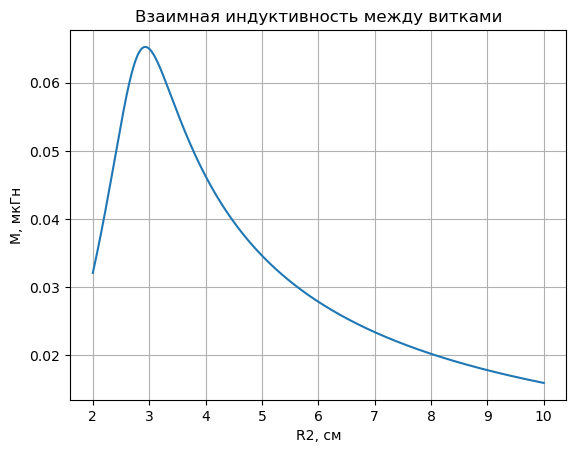

In [7]:
# расчёт взаимной индуктивности
m_r1r2 = calc_mutual_inductance(coil_1, coil_2, d)

# отображение графика в см и мк
plot(coil_2[0][0] * 10 ** 2, m_r1r2[0][0] * 10 ** 6, x_label="R2, см", y_label="M, мкГн",
     title="Взаимная индуктивность между витками",
     name_save_file="mutual_inductance_two_turns.png")

In [8]:
# максимум Mmax
print(f"Mmax = {np.max(m_r1r2[0][0]) * 10 ** 6} мкГн при R = {coil_2[0][0][np.argmax(m_r1r2)] * 10 ** 2} см")

Mmax = 0.06526474239015682 мкГн при R = 2.928928928928929 см


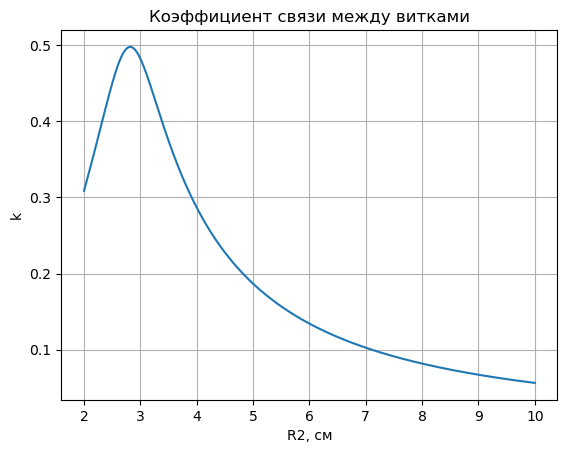

In [9]:
# расчёт коэффициента связи
k_r1r2 = calc_coupling_coefficient(coil_1, coil_2, d)
# отображение графика
plot(coil_2[0][0] * 10 ** 2, k_r1r2[0][0], x_label="R2, см", y_label="k",
     title="Коэффициент связи между витками",
     name_save_file="couple_coef_two_turns.png")

In [10]:
# максимум kmax
print(f"kmax = {np.max(k_r1r2[0][0])} при Rmax = {coil_2[0][0][np.argmax(k_r1r2)] * 10 ** 2} см")

kmax = 0.49795331065571463 при Rmax = 2.824824824824825 см
